Import Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import scipy.stats as stat
import numpy as np
import plotly.graph_objs as go
import plotly

ModuleNotFoundError: No module named 'pandas'

Read Dataset

In [2]:
url = 'https://drive.google.com/file/d/1kSwh_sTFn2yINnkcv485lmB73n8H_JJB/view?usp=sharing'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]
dt_covid = pd.read_csv(url)

NameError: name 'pd' is not defined

Handling check error

In [ ]:
try: 
  dt_covid = pd.read_csv(url)
except:
  print('Dataset fail to load') 

Dataset fail to load


Added month and year column

In [ ]:
dt_covid['dt_month'] = dt_covid['date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").strftime('%m'))
dt_covid['dt_year'] = dt_covid['date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").strftime('%Y'))

Sorting covid data in Indonesia

In [ ]:
dtind = dt_covid[dt_covid['location']=='Indonesia']

Line chart of total cases and covid vaccines in Indonesia by month

<Figure size 36000x14400 with 0 Axes>

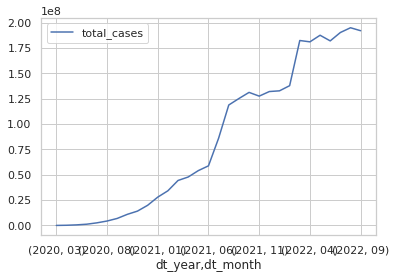

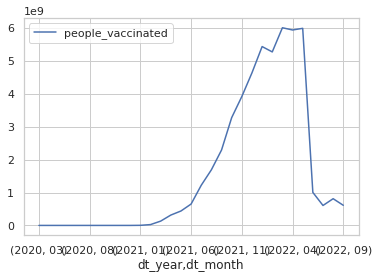

In [ ]:
plt.figure(figsize = (500,200))
case_month = dtind.groupby(['dt_year', 'dt_month'])['total_cases'].sum()
vacc = dtind.groupby(['dt_year', 'dt_month'])['people_vaccinated'].sum()
casemonth = pd.DataFrame(case_month)
vaccmonth = pd.DataFrame(vacc)
casemonth.plot()
vaccmonth.plot()
plt.show()

Sorting covid data in Southeast Asia

In [ ]:
dt_covid.loc[dt_covid['iso_code']=='IDN', 'continent'] = 'Southeast Asia'
dt_covid.loc[dt_covid['iso_code']=='IDN', 'continent'] = 'Southeast Asia'
dt_covid.loc[dt_covid['iso_code']=='KHM', 'continent'] = 'Southeast Asia'
dt_covid.loc[dt_covid['iso_code']=='MYS', 'continent'] = 'Southeast Asia'
dt_covid.loc[dt_covid['iso_code']=='SGP', 'continent'] = 'Southeast Asia'
dt_covid.loc[dt_covid['iso_code']=='THA', 'continent'] = 'Southeast Asia'
dt_covid.loc[dt_covid['iso_code']=='PHL', 'continent'] = 'Southeast Asia'
dt_covid.loc[dt_covid['iso_code']=='BRN', 'continent'] = 'Southeast Asia'
dt_covid.loc[dt_covid['iso_code']=='LAO', 'continent'] = 'Southeast Asia'
dt_covid.loc[dt_covid['iso_code']=='MMR', 'continent'] = 'Southeast Asia'
dt_covid.loc[dt_covid['iso_code']=='VNM', 'continent'] = 'Southeast Asia'

Make a breakdown of total cases, total deaths, number of vaccinations and number of people aged 65 and over in Southeast Asia based on new cases of covid

In [ ]:
dtSA = dt_covid[dt_covid['continent']=='Southeast Asia']
tcsa = dtSA.groupby('location')['new_cases'].sum().reset_index()
tcsa = dtSA.groupby('location')['new_cases'].sum().reset_index()
td = dtSA.groupby('location')['new_deaths'].sum().reset_index()
sa = pd.merge(left=tcsa, right=td, how='right', left_on='location', right_on='location')
sa = sa.rename(columns={'new_cases': 'total_cases', 'new_deaths':'total_deaths'})
vacc = dtSA.groupby('location')['people_vaccinated'].mean().reset_index()
sa = pd.merge(left=sa, right=vacc, how='right', left_on='location', right_on='location')
aged = dtSA.groupby('location')['aged_65_older'].mean().reset_index()
sa = pd.merge(left=sa, right=aged, how='right', left_on='location', right_on='location')
sa

,location,total_cases,total_deaths,people_vaccinated,aged_65_older
0,Brunei,227774.0,225.0,2.175635e+05,4.591
1,Cambodia,137877.0,3056.0,9.225538e+06,4.412
2,Indonesia,6431624.0,158112.0,1.005689e+08,5.319
3,Laos,215862.0,759.0,2.733195e+06,4.029
4,Malaysia,4840879.0,36396.0,1.983140e+07,6.293
5,Myanmar,622802.0,19460.0,1.883005e+07,5.732
6,Philippines,3948685.0,62955.0,1.536472e+07,4.803
7,Singapore,1907907.0,1618.0,3.834728e+06,12.922
8,Thailand,4691472.0,32846.0,3.859888e+07,11.373
9,Vietnam,10920416.0,43149.0,4.129622e+07,7.150


Barplot people aged 65 and over by location

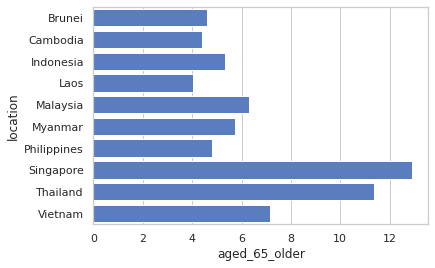

In [ ]:
sns.set_color_codes('muted')
sns.barplot(x='aged_65_older', y='location', data=sa,
            label='Total Cases', color='b')

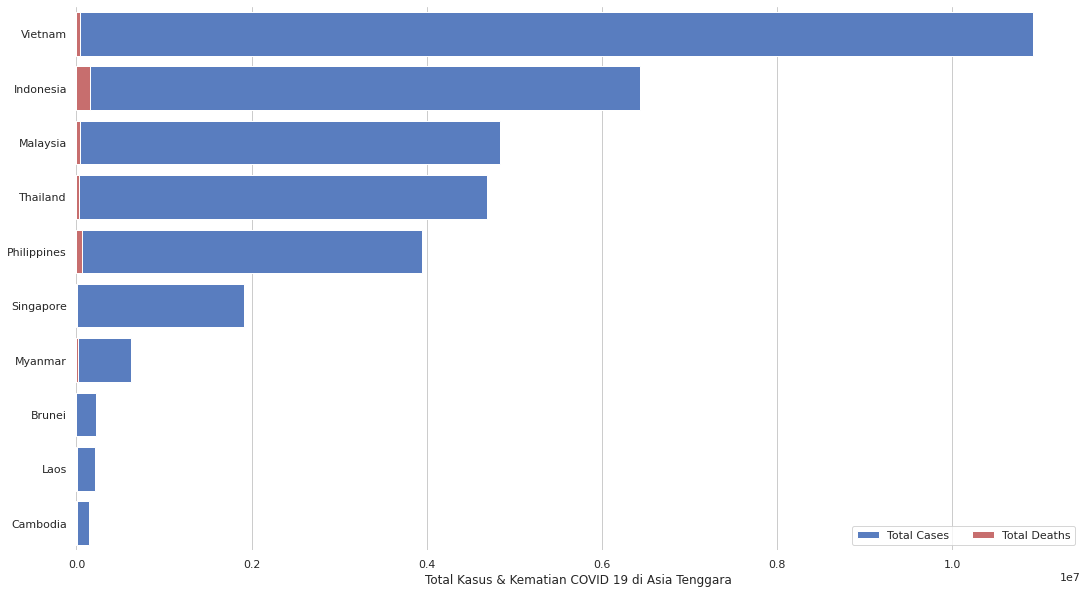

In [ ]:
sns.set_theme(style='whitegrid')

f, ax = plt.subplots(figsize=(18, 10))

sa = sa.sort_values('total_cases', ascending=False)

sns.set_color_codes('muted')
sns.barplot(x='total_cases', y='location', data=sa,
            label='Total Cases', color='b')

sns.set_color_codes('muted')
sns.barplot(x='total_deaths', y='location', data=sa,
            label='Total Deaths', color='r')

ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(ylabel='',
       xlabel='Total Kasus & Kematian COVID 19 di Asia Tenggara')
sns.despine(left=True, bottom=True)

Barplot of total COVID-19 Cases & Deaths in Southeast Asia

In [ ]:
dtind_td = dtind['new_deaths'].sum()
dtind_tc = dtind['new_cases'].sum()
dtind_pop = dtind['population'].mean()
dtind_vac = dtind['people_vaccinated'].max()
dtind_fullvacc= dtind['people_fully_vaccinated'].max()
agedid = (dtind['aged_65_older'].max() * dtind['population'].max())/100

fig = plotly.subplots.make_subplots(rows=3, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=['total_cases', 'populasi'], values=[dtind_tc,dtind_pop]),
              1, 1)
fig.add_trace(go.Pie(labels=['total_deaths', 'populasi'], values=[dtind_td,dtind_pop]),
              1, 2)
fig.add_trace(go.Pie(labels=['total_vaksin1', 'populasi'], values=[dtind_vac,dtind_pop]),
              2, 1)
fig.add_trace(go.Pie(labels=['total_full_vaksin', 'populasi'], values=[dtind_fullvacc,dtind_pop]), 
              2, 2)
fig.add_trace(go.Pie(labels=['ageid', 'populasi'], values=[agedid,dtind_pop]), 
              3, 1)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(autosize=False, height = 500, width = 700, title_text="Recap Indonesia's Covid Condition",
    annotations=[dict(text='Cases', x=0.09, y=0.73, font_size=12, showarrow=False),
                 dict(text='Deaths', x=0.5, y=0.73, font_size=12, showarrow=False),
                 dict(text='Total Vaksin 1', x=0.05, y=0.31, font_size=12, showarrow=False),
                 dict(text='Total Full Vaksin', x=0.5, y=0.31, font_size=12, showarrow=False),
                  dict(text='Total Umur > 65', x=0.05, y=-0.07, font_size=12, showarrow=False)])

fig.show()

Combining data on average people aged 65 and over and new cases of covid by location

In [ ]:
oldage_all = dt_covid.groupby('location')['aged_65_older'].mean().reset_index()
tdeathsall = dt_covid.groupby('location')['new_deaths'].sum().reset_index()
agetdall = pd.merge(left=oldage_all, right=tdeathsall, how='right', left_on='location', right_on='location')
agetdall = agetdall.dropna()
agetdall = agetdall.rename(columns={ 'new_deaths':'total_deaths'})

Boxplot combining data on average people aged 65 and over and new cases of covid by location

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbc3aa80450>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbc3aa71950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbc3aa80a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbc3abc64d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbc3abc6710>],
 'means': []}

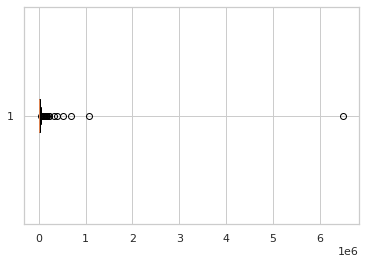

In [ ]:
plt.boxplot(agetdall['total_deaths'], vert=False)

Identification of outlier data in combining the average data of people aged 65 years and over and new cases of covid based on location

In [ ]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
  
sample_outliers = detect_outliers_zscore(agetdall.total_deaths)
agetdall = agetdall[~agetdall.total_deaths.isin(sample_outliers)]
print(sample_outliers)

[6507159.0]


In [ ]:
fig = px.scatter(agetdall, x='aged_65_older', y='total_deaths', width=500, height=400)

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [ ]:
dt_covid['continent'].isnull().sum()

12673

In [ ]:
dt_covid['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', 'Southeast Asia'], dtype=object)

In [ ]:
d1= dt_covid[dt_covid['continent'].isna()]
loc_nan = d1['location'].unique()
loc_nan

array(['Africa', 'Asia', 'Europe', 'European Union', 'High income',
       'International', 'Low income', 'Lower middle income',
       'North America', 'Oceania', 'South America', 'Upper middle income',
       'World'], dtype=object)

In [ ]:
mask1  = (dt_covid['location']=='Africa')
dt_covid.loc[mask1, 'continent'] = dt_covid.loc[mask1, 'continent'].fillna('Africa')
mask2  = (dt_covid['location']=='Asia')
dt_covid.loc[mask2, 'continent'] = dt_covid.loc[mask2, 'continent'].fillna('Asia')
mask3  = (dt_covid['location']=='Europe')
dt_covid.loc[mask3, 'continent'] = dt_covid.loc[mask3, 'continent'].fillna('Europe')
mask4  = (dt_covid['location']=='World')
dt_covid.loc[mask4, 'continent'] = dt_covid.loc[mask4, 'continent'].fillna('World')
mask5  = (dt_covid['location']=='Oceania')
dt_covid.loc[mask5, 'continent'] = dt_covid.loc[mask5, 'continent'].fillna('Ocenia')
mask6  = (dt_covid['location']=='International')
dt_covid.loc[mask6, 'continent'] = dt_covid.loc[mask6, 'continent'].fillna('International')
mask7  = (dt_covid['location']=='South America')
dt_covid.loc[mask7, 'continent'] = dt_covid.loc[mask7, 'continent'].fillna('South America')
mask8  = (dt_covid['location']=='North America')
dt_covid.loc[mask8, 'continent'] = dt_covid.loc[mask8, 'continent'].fillna('North America')
mask9  = (dt_covid['location']=='European Union')
dt_covid.loc[mask9, 'continent'] = dt_covid.loc[mask9, 'continent'].fillna('European Union')
mask10  = dt_covid['location'].str.contains('income')
dt_covid.loc[mask10, 'continent'] = dt_covid.loc[mask10, 'continent'].fillna('Income')

In [ ]:
dt_covid[dt_covid['continent']=='Income']['location'].value_counts()
inc = dt_covid[dt_covid['continent']=='Income']
inc_d = inc.groupby('location')['new_deaths'].sum().reset_index()
inc_c = inc.groupby('location')['new_cases'].sum().reset_index()
inc = pd.merge(left=inc_d, right=inc_c, how='right', left_on='location', right_on='location')

In [ ]:
inc

,location,new_deaths,new_cases
0,High income,2661448.0,381098525.0
1,Low income,47660.0,2244323.0
2,Lower middle income,1327601.0,95528123.0
3,Upper middle income,2470364.0,137050938.0


In [ ]:
for i in inc['location'] :
  cperd = inc[inc['location']==i]['new_deaths']/inc[inc['location']==i]['new_cases']
  print(i)
  print(cperd)

High income
0    0.006984
dtype: float64
Low income
1    0.021236
dtype: float64
Lower middle income
2    0.013897
dtype: float64
Upper middle income
3    0.018025
dtype: float64


In [ ]:
perc = [0.006984, 0.021236, 0.013897, 0.018025]
inc['percentage'] = perc

In [ ]:
fig = px.bar(inc, x='location', y='percentage')
fig.show()